<a href="https://colab.research.google.com/github/ethankyle360/ML4SupplyChain/blob/main/SC_Shipment_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the following dependencies and packages.



In [ ]:
import pandas as pd # For data manipulation and analysis so that working with structured data is easier
import numpy as np # For complex numerical operations/computing
from decimal import Decimal # For handling decimal numbers more accurately
import matplotlib.pyplot as plt # For creating animated visualizations
# For displaying plots below the code
%matplotlib inline
import seaborn as sn # Based on matplotlib, but creates more attractive statistical graphics
import os # For interacting with the file system. E.g reading files, creating directories, and etc
import plotly.graph_objs as go # For creating visually appealing graphs and charts
import plotly.offline as py # For viewing plots offline without needing internet connection
py.init_notebook_mode(connected=True) # Makes sure that Plotly graphs are displayed properly
pd.options.mode.chained_assignment = None # Controls the setting on chained assignment of pandas
pd.options.display.max_columns = 9999 # For displaying all the columns of a dataframe
pd.options.display.float_format = '{:20,.2f}'.format # For showing two decimal places to make it easier to read

## Import the "SCMS_Delivery_History_Dataset.csv" file
## Every missing value in our dataframe will be replaced with '0'

In [13]:
DataSet = pd.read_csv('/content/SCMS_Delivery_History_Dataset.csv').fillna(0)

## Check the total records in our CSV file

In [14]:
TotalRowCount = len(DataSet)
print("Total Number of Data Count :", TotalRowCount)

Total Number of Data Count : 10324


## Check the following DataTypes used from our CSV file

In [15]:
DataSet.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


## Print the first 10 and last 10 records from our DataSet

In [16]:
DataSet.head(10)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,0,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,0.00
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,"6,200.00",6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,0.00
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,0,Test kit,100,500,"40,000.00",80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,0.00
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,"127,360.80",3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,0.00
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,"121,600.00",3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,0.00
5,23,112-NG-T01,Pre-PQ Process,SCMS-87,ASN-57,Nigeria,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,28-Sep-06,28-Sep-06,28-Sep-06,ARV,Pediatric,Aurobindo Pharma Limited,"Zidovudine 10mg/ml, oral solution, Bottle, 240 ml",Zidovudine,Generic,10mg/ml,Oral solution,240,416,"2,225.60",5.35,0.02,"Aurobindo Unit III, India",Yes,504,5920.42,0.00
6,44,110-ZM-T01,Pre-PQ Process,SCMS-139,ASN-130,Zambia,PMO - US,Direct Drop,DDU,Air,Pre-PQ Process,Date Not Captured,8-Jan-07,8-Jan-07,8-Jan-07,ARV,Pediatric,MERCK SHARP & DOHME IDEA GMBH (FORMALLY MERCK ...,"Efavirenz 200mg [Stocrin/Sustiva], capsule, 90...",Efavirenz,Stocrin/Sustiva,200mg,Capsule,90,135,"4,374.00",32.40,0.36,MSD South Granville Australia,Yes,328,Freight Included in Commodity Cost,0.00
7,45,109-TZ-T01,Pre-PQ Process,SCMS-140,ASN-94,Tanzania,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,24-Nov-06,24-Nov-06,24-Nov-06,ARV,Adult,Aurobindo Pharma Limited,"Nevirapine 200mg, tablets, 60 Tabs",Nevirapine,Generic,200mg,Tablet,60,16667,"60,834.55",3.65,0.06,"Aurobindo Unit III, India",Yes,1478,6212.41,0.00
8,46,112-NG-T01,Pre-PQ Process,SCMS-156,ASN-93,Nigeria,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,7-Dec-06,7-Dec-06,7-Dec-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,273,532.35,1.95,0.03,"Aurobindo Unit III, India",No,See ASN-93 (ID#:1281),See ASN-93 (ID#:1281),0.00
9,47,110-ZM-T01,Pre-PQ Process,SCMS-165,ASN-199,Zambia,PMO - US,Direct Drop,CIP,Air,Pre-PQ Process,11/13/06,30-Jan-07,30-Jan-07,30-Jan-07,ARV,Adult,ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),"Lopinavir/Ritonavir 200/50mg [Aluvia], tablet

In [17]:
DataSet.tail(10)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10314,86813,151-NG-T30,FPQ-14989,SO-51422,DN-4274,Nigeria,PMO - US,From RDC,N/A - From RDC,Air Charter,9/19/14,N/A - From RDC,30-Jun-15,15-May-15,22-May-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,10340,"37,224.00",3.60,0.06,Mylan (formerly Matrix) Nashik,No,See DN-4274 (ID#:84472),See DN-4274 (ID#:84472),38.27
10315,86814,151-NG-T30,FPQ-14989,SO-51424,DN-4276,Nigeria,PMO - US,From RDC,N/A - From RDC,Air Charter,9/19/14,N/A - From RDC,30-Jun-15,15-May-15,22-May-15,ARV,Adult,SCMS from RDC,"Lopinavir/Ritonavir 200/50mg [Aluvia], tablets...",Lopinavir/Ritonavir,Aluvia,200/50mg,Tablet,120,70000,"1,304,800.00",18.64,0.16,ABBVIE Ludwigshafen Germany,Yes,15198,26180,"1,341.33"
10316,86815,151-NG-T30,FPQ-16313,SO-51420,DN-4279,Nigeria,PMO - US,From RDC,N/A - From RDC,Air Charter,5/4/15,N/A - From RDC,2-Jun-15,15-May-15,22-May-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,15000,"97,800.00",6.52,0.11,"Aurobindo Unit III, India",Yes,1547,3410,115.11
10317,86816,151-NG-T30,FPQ-16313,SO-51440,DN-4282,Nigeria,PMO - US,From RDC,N/A - From RDC,Air,5/4/15,N/A - From RDC,30-Jun-15,22-Jun-15,29-Jun-15,ARV,Adult,SCMS from RDC,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,600mg,Tablet,30,6724,"20,978.88",3.12,0.10,"Strides, Bangalore, India.",No,See DN-4282 (ID#:83919),See DN-4282 (ID#:83919),24.69
10318,86817,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/14,N/A - From RDC,31-Jul-15,15-Jul-15,20-Jul-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,205243,"738,874.80",3.60,0.06,"Cipla, Goa, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),869.66
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/14,N/A - From RDC,31-Jul-15,15-Jul-15,20-Jul-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,166571,"599,655.60",3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,10/24/14,N/A - From RDC,31-Jul-15,6-Aug-15,7-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,21072,"137,389.44",6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,8/12/14,N/A - From RDC,31-Aug-15,25-Aug-15,3-Sep-15,ARV,Adult,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,600/300/300mg,Tablet - FDC,30,514526,"5,140,114.74",9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,"5,284.04"
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,7/1/15,N/A - From RDC,9-Sep-15,4-Aug-15,11-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovu

## Total 10 Country wise count with graph
### Country wise count is a summary to count how many times each country is recorded from our dataset.

Top 10 Countries Wise Count 

Country
South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Tanzania          519
Name: count, dtype: int64


Text(0.5, 0, 'Country Name')

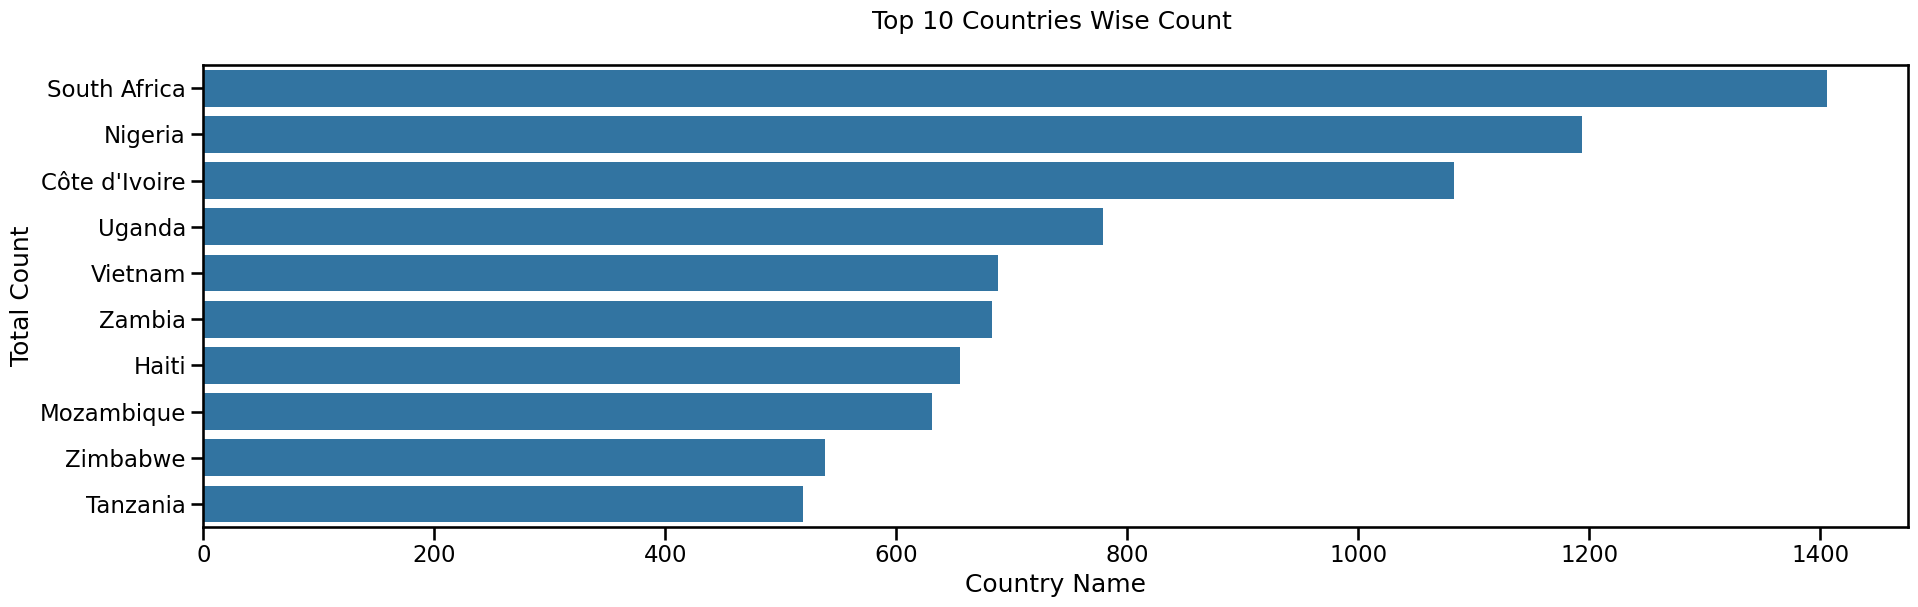

In [23]:
DataSet = DataSet.dropna() # Removes rows in our dataset that have missing values in any column
ItemCount = DataSet["Country"].value_counts().nlargest(10) # Select the 10 countries with the highest counts of occurences
print("Top 10 Countries Wise Count \n")
print(ItemCount)
sn.set_context("talk",font_scale=1) # A seaborn function to configure the style of our plot
plt.figure(figsize=(22,6)) # Set the figure width to 22 inches and 6 inches for the height
# Creates a count plot for the "country column" and sorts the bars by count in descending order (highest to lowest counts)
sn.countplot(DataSet['Country'],order = DataSet['Country'].value_counts().nlargest(10).index)
plt.title('Top 10 Countries Wise Count \n') # Set the title for our graph
plt.ylabel('Total Count') # Set name at y-axis
plt.xlabel('Country Name') # Set name at x-axis